## Using the MNIST and CIFER 10 Dataset

In this project we will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/) and [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

Step 1) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster in the mnist dataset.


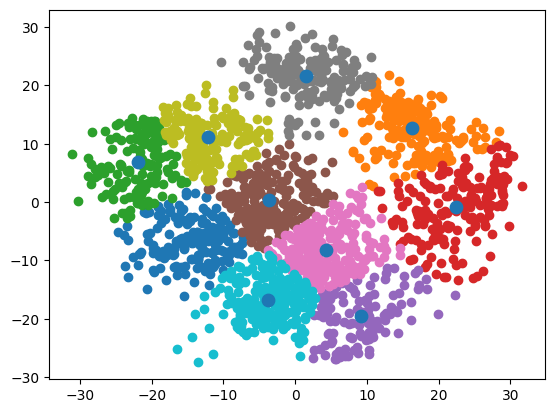

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import metrics

mnist = load_digits()

# your code here

mnist_data = mnist.data
decomposed = PCA(2)

df7 = decomposed.fit_transform(mnist_data)

km = KMeans(n_clusters=10)
clusters = km.fit_predict(df7)
#print(clusters)

centroids = km.cluster_centers_
#print(centroids)

for cluster_num in range(10):
    plt.scatter(df7[clusters == cluster_num, 0], df7[clusters == cluster_num, 1])

plt.scatter(centroids[:, 0], centroids[:,1], s = 80)
plt.show()

Step 2) plotting a random image from the dataset.

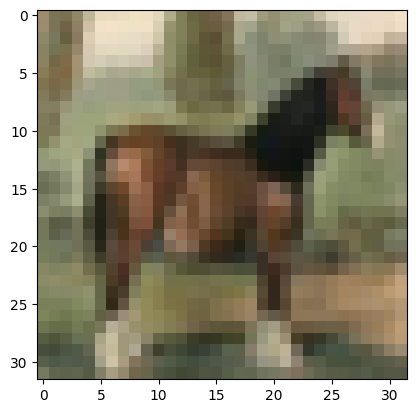

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

 
batch_1 = unpickle('data/cifar-10-batches-py/data_batch_1')
#meta = unpickle('cifar-10-batches-py/batches.meta')

# understanding the dataset

#print(batch_1)
#print(batch_1.keys())
#print(batch_1[b'batch_label'])
#print(batch_1[b'data'])
#print(batch_1[b'labels'])
#print(meta.keys())
#print(meta[b'label_names'])

#print(len(batch_1[b'data']))

import matplotlib.pyplot as plt
from random import randint

# generating random image
random = randint(0, 1000)

image_data = batch_1[b'data'][random]
# reshape 
image_data = image_data.reshape(3,32,32)
# transpose 
image_data = image_data.transpose(1,2,0)
# display 
plt.imshow(image_data)

Step 3) Produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans)

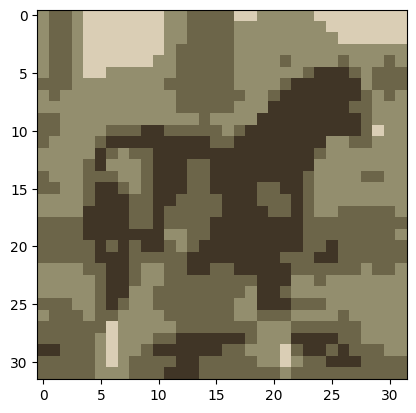

In [3]:
km2 = KMeans(4).fit(image_data.reshape(1024, 3))

km2.cluster_centers_
fourc_image = km2.labels_

img = np.array([[km2.cluster_centers_[fourc_image[i]]/255 for i in range(1024)]]).reshape(32,32,3)
plt.imshow(img)